In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('advertising.csv')
df['Total'] = df.TV + df.Radio + df.Newspaper

In [3]:
df

,TV,Radio,Newspaper,Sales,Total
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,12.0,132.4
3,151.5,41.3,58.5,16.5,251.3
4,180.8,10.8,58.4,17.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,14.0,107.2
197,177.0,9.3,6.4,14.8,192.7
198,283.6,42.0,66.2,25.5,391.8


In [4]:
df.isna().any().any() # check for empty vals

False

## Periods the business has lost money 💔

In [5]:
df[df.Total > df.Sales]

,TV,Radio,Newspaper,Sales,Total
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,12.0,132.4
3,151.5,41.3,58.5,16.5,251.3
4,180.8,10.8,58.4,17.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,14.0,107.2
197,177.0,9.3,6.4,14.8,192.7
198,283.6,42.0,66.2,25.5,391.8


## Woah! 😮 In each of all 200 periods, the business spent on advert more than it has sold!

## Let's look at a scatterplot

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

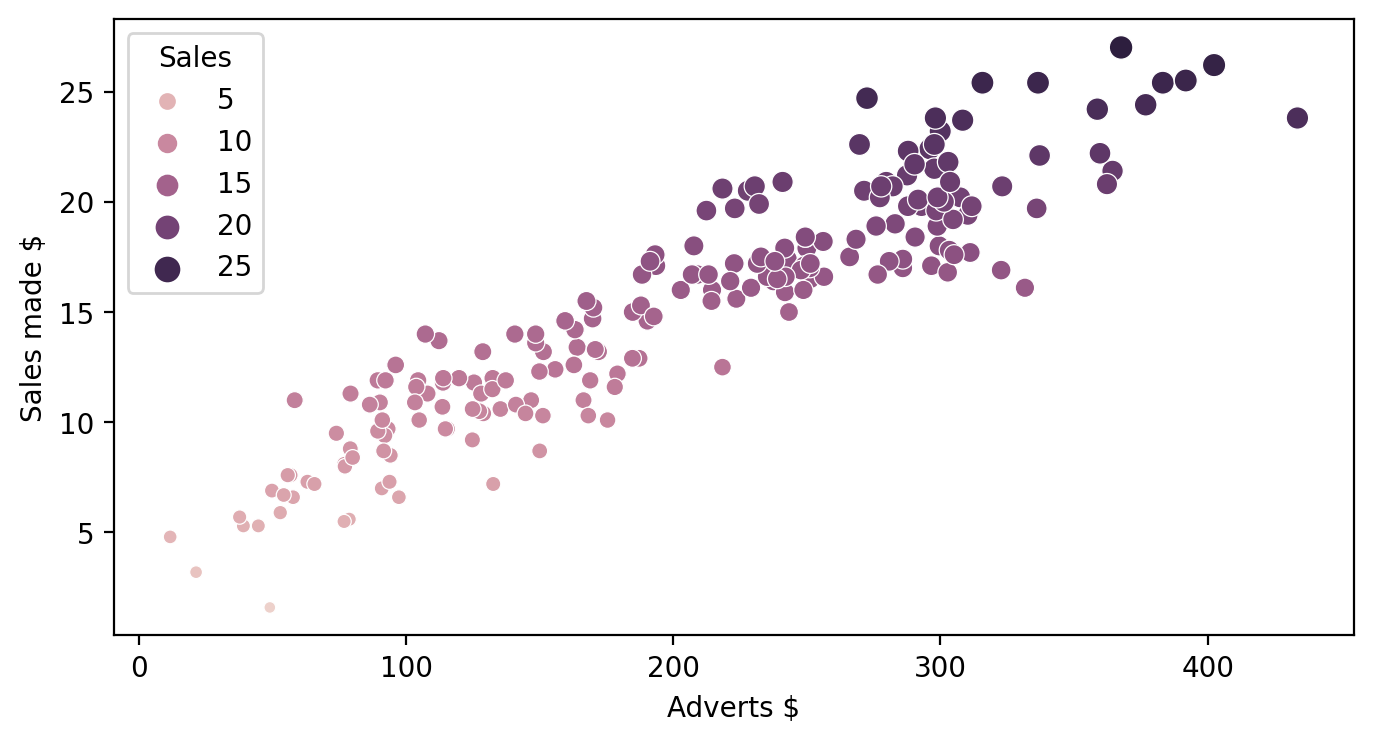

In [7]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=df,
                     x='Total', 
                     y='Sales',
                     hue='Sales', # colour
                     size='Sales',) # dot size
 
ax.set(
       ylabel='Sales made $',
       xlabel='Adverts $')
 
plt.show()

We can see a linear relationship.
As expected, businesses that spend more on advert mostly make more sales, but they still lost money anyway. The business that spent the most on advert (about $430) made about `$25` in sales, that's a profit of `-405` 💔

### Let's plot a simple regression line with `seaborn`

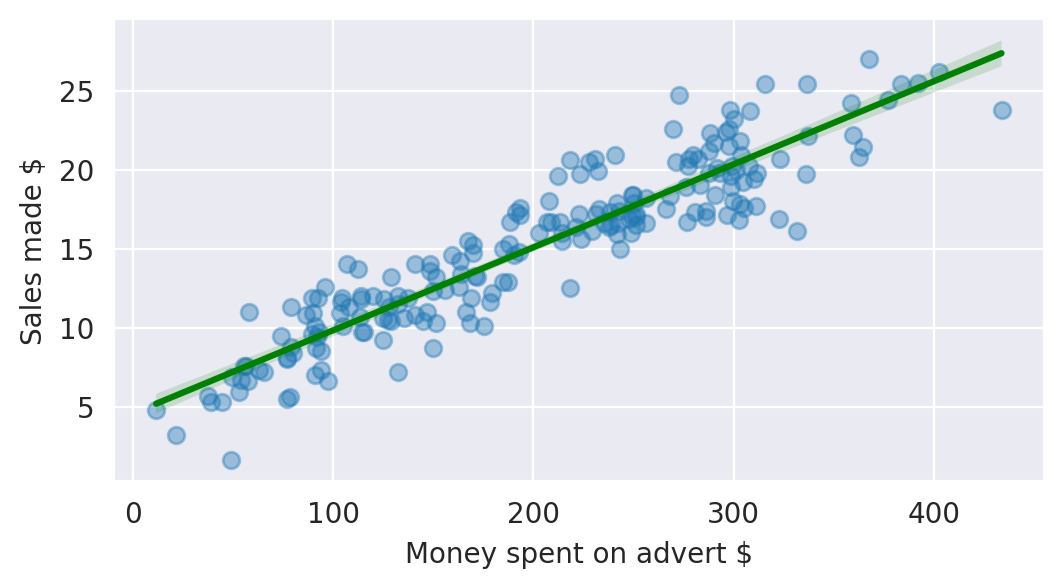

In [8]:
plt.figure(figsize=(6,3), dpi=200)
with sns.axes_style("darkgrid"):
    plot = sns.regplot(data=df, 
            x='Total', 
            y='Sales',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'green'})
    plot.set(
          xlabel='Money spent on advert $',
          ylabel='Sales made $'
          )

## Let's build a model!

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
regression = LinearRegression()

In [10]:
X = df.drop(columns=['Sales', 'Total']) # get the features (independent variables)
y = df.Sales # get the target (dependent variable)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
regression.fit(X_train, y_train) # train odel

LinearRegression()

In [13]:
pred = regression.predict(X_test) # make prediction

In [14]:
error = mean_absolute_error(y_true=y_test, y_pred=pred)
error

1.1199940713361771

In [15]:
y_mean = y_test.mean()
accuracy = 100 - (error / y_mean * 100)

In [16]:
accuracy

91.88997776005665

### An accuracy of `91.89%` means our model's predictions are, on average, about `91.89%` close to the actual values. This suggests that the model is performing quite well!

In [17]:
regression.intercept_

4.741842244124566

#### An intercept of 4.74 basically means that if we spend 0 dollars in advertisement, we will make about $5 in sales.

In [18]:
round(0.09975946, 2)

0.1

In [19]:
regression.coef_

array([0.05461383, 0.09975946, 0.00430495])

We passed to our model features in the order of `TV-Radio-Newspaper`, and the coefficients gave the above, meaning for each `$1` we spend on TV advert, we make about `$0.05` in sales, for each `$1` we spend on radio advert, we make about `$0.1` in sales, for each `$1` we spend on newspaper advert, we make about `$0.004` in sales.